<a href="https://colab.research.google.com/github/amanrock005/aman_solved_code/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
#importing as data frame
df = pd.read_csv("wine-reviews.csv", usecols = ['country','description','points','price','variety','winery'])

In [4]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [5]:
df = df.dropna(subset=["description", "points"])

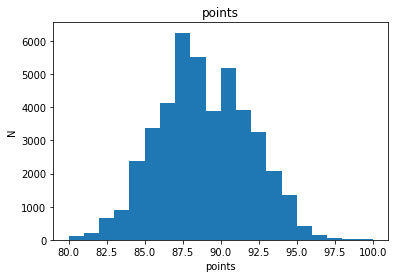

In [6]:
plt.hist(df.points, bins=20)
plt.title("points")
plt.ylabel("N")
plt.xlabel("points")
plt.show()

their are two types of learning 
1. supervised = give labled input
2. unsuperviesed = give unlabeled input

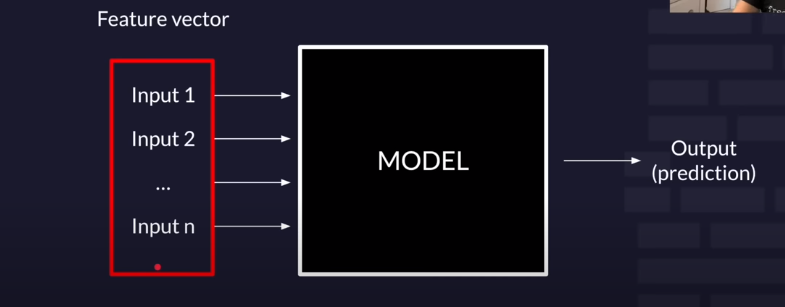



In [7]:
# in unsuperviesed we give a data and algorithm finds patter
# and classify them in different group based on those patter

In [8]:
# reinforcement learning is based on rewards and penalities

In [9]:
#types of input we give to model
# categorical data eg sex, feedback
# one hot encoding


# usa [1,0,0,0]
# India [0,1,0,0]
# Germany [0,0,1,0]
# uk [0,0,0,1]

#Quantitative = discrete or continous

In [10]:
#supervised learning is grouped into
# 1. classification or binary classification
# 2. regression eg stock value prediction or temperature

In [11]:
# data is divided into
# 1. training
# 2. validation
# 3. testing

# Give the feature matrix to the model and get a output and we 
# compare the output the loss is given back to model for 
# adustment

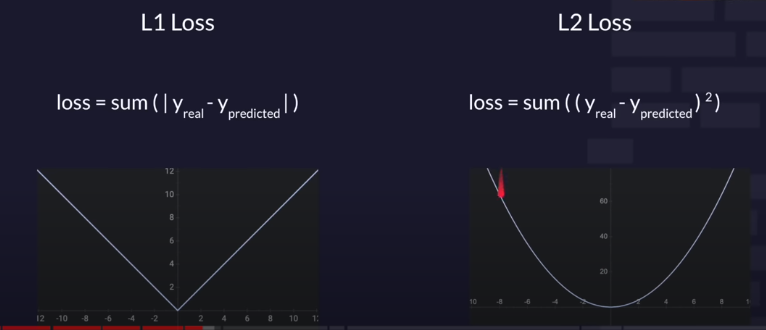

In [12]:
#activation function makes the input non linear

In [13]:
df['label'] = (df.points >= 90).astype(int)
df = df[["description", "points", "label"]]

In [14]:
df.tail()

,description,points,label
43899,This is an outlier in the Brian Carter lineup ...,92,1
43900,From the Serralunga d'Alba area of Barolo prod...,92,1
43901,Multiple vineyards contribute to this standout...,93,1
43902,This wine shows a fine balance between sweetne...,93,1
43903,"This blend of 35% Chardonnay, 35% Pinot Blanc ...",93,1


In [15]:
train, val, test = np.split(df.sample(frac=1),[int(0.8*len(df)), int(0.9*len(df))])

In [16]:
len(train), len(val), len(test)

(35123, 4390, 4391)

In [21]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [22]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [23]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'Smoky, elegant and soft aromas of leather, pepper and berry lead into flavors of cherry and cigarbox spice on the palate of this approachable Cabernet. The wine is not terribly complex, but good structure and acidity give it cellaring potential, and paired with duck, lamb or beef dishes, it will make a very nice addition to the table.',
        b"Are golfer-inspired wines the next big thing? First came Greg Norman, then Ernie Els, now there's Nick Faldo. Made by Katnook Estate, this is a dark, plushly textured wine that's immediately accessible. Cassis and plum fruit is framed by dark accents of coffee and cola, picking up hints of mint on the finish. Imported by Freixenet USA.",
        b'Very ripe prune and wild berry flavors fill this full-bodied and rather soft-textured wine. Based on Zinfandel grapes, it is bold in aroma, forward in flavor, smooth in the mouth and tastes a little bit sweet on the finish.',
        ...,
   

#Embedding + Model

In [37]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [38]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 128), dtype=float32, numpy=
array([[ 0.59698015, -0.32613778,  0.18677467, ..., -0.0711047 ,
         0.02068921,  0.01180447],
       [ 0.5933371 , -0.21950777, -0.00409732, ...,  0.07879156,
        -0.04714383,  0.02763043],
       [ 0.10238551, -0.13657074,  0.13514878, ...,  0.00872203,
        -0.02642066, -0.13673691],
       ...,
       [ 0.5548053 , -0.3315863 ,  0.1624257 , ..., -0.17388843,
         0.12581426,  0.07978995],
       [ 0.5699706 , -0.12134864,  0.0910327 , ..., -0.15202917,
         0.14385052, -0.08610789],
       [ 0.18820864, -0.2811966 ,  0.11190154, ...,  0.05376809,
         0.06100197, -0.03439644]], dtype=float32)>

In [39]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [41]:
model.evaluate(train_data)

35/35 [==============================] - 1s 11ms/step - loss: 0.6841 - accuracy: 0.5943


[0.6841482520103455, 0.5943114161491394]

In [42]:
model.evaluate(valid_data)

5/5 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.6016


[0.6827887296676636, 0.6015945076942444]

In [43]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
35/35 [==============================] - 61s 2s/step - loss: 0.6333 - accuracy: 0.6347 - val_loss: 0.5589 - val_accuracy: 0.7269
Epoch 2/5
35/35 [==============================] - 50s 1s/step - loss: 0.5275 - accuracy: 0.7235 - val_loss: 0.4654 - val_accuracy: 0.7886
Epoch 3/5
35/35 [==============================] - 57s 2s/step - loss: 0.4453 - accuracy: 0.7940 - val_loss: 0.4322 - val_accuracy: 0.8062
Epoch 4/5
35/35 [==============================] - 64s 2s/step - loss: 0.3883 - accuracy: 0.8379 - val_loss: 0.4191 - val_accuracy: 0.8066
Epoch 5/5
35/35 [==============================] - 62s 2s/step - loss: 0.3463 - accuracy: 0.8671 - val_loss: 0.4181 - val_accuracy: 0.8055


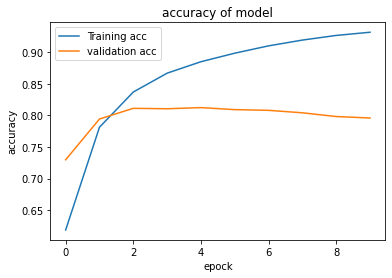

In [35]:
plt.plot(history.history['accuracy'],label="Training acc")
plt.plot(history.history['val_accuracy'], label="validation acc")
plt.title("accuracy of model")
plt.ylabel("accuracy")
plt.xlabel("epock")
plt.legend()
plt.show()

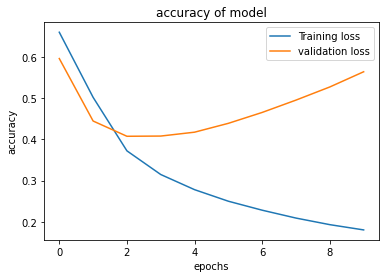

In [36]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("accuracy of model")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()


In [44]:
model.evaluate(test_data)

5/5 [==============================] - 1s 168ms/step - loss: 0.4034 - accuracy: 0.8183


[0.40339452028274536, 0.8182646036148071]

#LSTM

In [45]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [46]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'to', 'it', 'its', 'fruit', 'on', 'aromas',
       'palate', 'that'], dtype='<U17')

In [47]:
model = tf.keras.Sequential([
                            encoder,
                             tf.keras.layers.Embedding(
                                 input_dim=len(encoder.get_vocabulary()),
                                 output_dim=32,
                                 mask_zero=True
                             ),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [49]:
model.evaluate(train_data)
model.evaluate(valid_data)

5/5 [==============================] - 1s 121ms/step - loss: 0.6946 - accuracy: 0.3702


[0.6945629119873047, 0.37015944719314575]

In [50]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
35/35 [==============================] - 20s 464ms/step - loss: 0.6700 - accuracy: 0.6152 - val_loss: 0.6329 - val_accuracy: 0.6305
Epoch 2/5
35/35 [==============================] - 14s 413ms/step - loss: 0.5383 - accuracy: 0.7194 - val_loss: 0.4336 - val_accuracy: 0.7991
Epoch 3/5
35/35 [==============================] - 15s 420ms/step - loss: 0.4020 - accuracy: 0.8223 - val_loss: 0.3961 - val_accuracy: 0.8196
Epoch 4/5
35/35 [==============================] - 15s 417ms/step - loss: 0.3670 - accuracy: 0.8427 - val_loss: 0.3790 - val_accuracy: 0.8260
Epoch 5/5
35/35 [==============================] - 14s 413ms/step - loss: 0.3481 - accuracy: 0.8524 - val_loss: 0.3716 - val_accuracy: 0.8308


In [51]:
model.evaluate(test_data)

5/5 [==============================] - 1s 223ms/step - loss: 0.3577 - accuracy: 0.8426


[0.3577295243740082, 0.8426326513290405]